In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv("sales.csv")

In [187]:
df.head()

,order_id,date,store,product,quantity,sales
0,1,01/01/2023,Lower Manhattan,Gourmet brewed coffee,2,6.0
1,2,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2
2,3,01/01/2023,Lower Manhattan,Hot chocolate,2,9.0
3,4,01/01/2023,Lower Manhattan,Drip coffee,1,2.0
4,5,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2


In [188]:
#Ubah kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [189]:
#Cek Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  149116 non-null  int64         
 1   date      149116 non-null  datetime64[ns]
 2   store     149116 non-null  object        
 3   product   149116 non-null  object        
 4   quantity  149116 non-null  int64         
 5   sales     149116 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB


In [190]:
#Cek Missing Value
df.isnull().sum()

order_id    0
date        0
store       0
product     0
quantity    0
sales       0
dtype: int64

In [191]:
df.describe()

,order_id,date,quantity,sales
count,149116.000000,149116,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,4.686367
min,1.000000,2023-01-01 00:00:00,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,3.750000
75%,112094.250000,2023-05-30 00:00:00,2.000000,6.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,360.000000
std,43153.600016,NaN,0.542509,4.227099


In [192]:
df[['quantity','sales']].corr()

,quantity,sales
quantity,1.000000,0.356231
sales,0.356231,1.000000


1. Bagaimana tren penjualan dari waktu ke waktu?

In [193]:
df_time = df.groupby(df['date'].dt.to_period('M')).agg({
    'sales':'sum'
}).reset_index()

df_time['date'] = df_time['date'].astype(str)
df_time

,date,sales
0,2023-01,81677.74
1,2023-02,76145.19
2,2023-03,98834.68
3,2023-04,118941.08
4,2023-05,156727.76
5,2023-06,166485.88


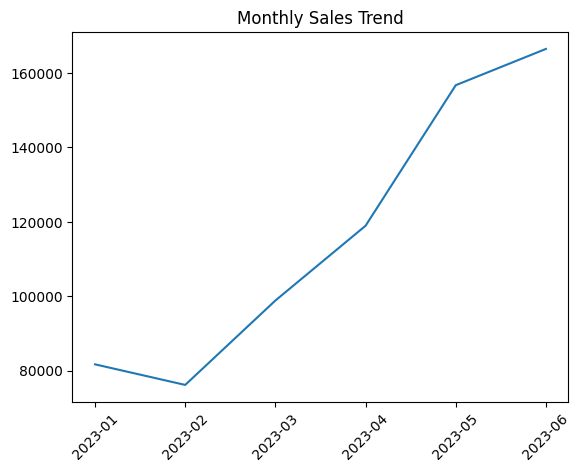

In [194]:
plt.figure()
plt.plot(df_time['date'], df_time['sales'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()

2. Store mana yang memiliki total penjualan tertinggi?

In [195]:
store_sales = df.groupby('store')['sales'].sum().sort_values(ascending=False)
store_sales

store
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: sales, dtype: float64

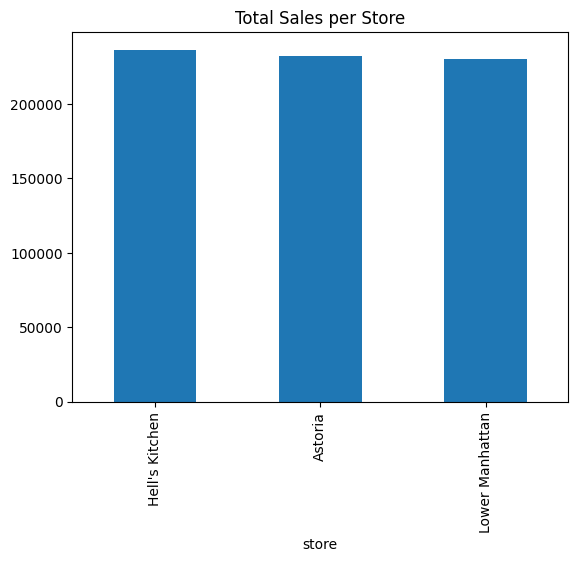

In [196]:
store_sales.plot(kind='bar')
plt.title("Total Sales per Store")
plt.show()

3. Produk apa yang paling banyak terjual berdasarkan quantity?

In [197]:
top_quantity = df.groupby('product')['quantity'].sum().sort_values(ascending=False)
top_quantity

product
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Brewed Green tea          8697
Regular syrup             7606
Pastry                    6961
Biscotti                  5788
Sugar free syrup          2905
Housewares                 555
Chai tea                   443
Organic Beans              420
Premium Beans              406
Gourmet Beans              366
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Clothing                   221
Organic Chocolate          221
House blend Beans          183
Green tea                  159
Green beans                134
Name: quantity, dtype: int64

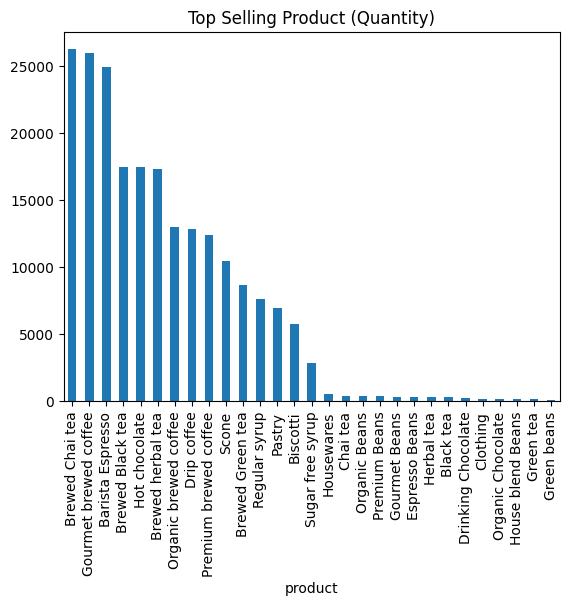

In [198]:
top_quantity.plot(kind='bar')
plt.title("Top Selling Product (Quantity)")
plt.show()

4. Produk mana yang menghasilkan revenue terbesar?

In [199]:
top_sales_product = df.groupby('product')['sales'].sum().sort_values(ascending=False)
top_sales_product

product
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
Name: 

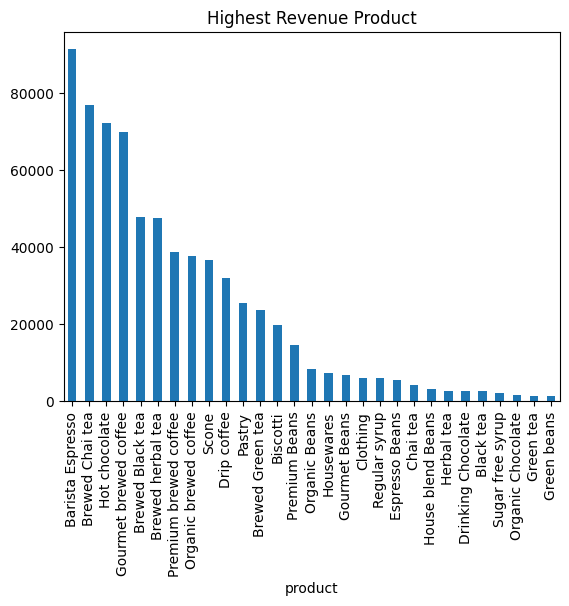

In [200]:
top_sales_product.plot(kind='bar')
plt.title("Highest Revenue Product")
plt.show()

5. Apakah ada hubungan antara quantity dan sales?

In [201]:
correlation = df[['quantity','sales']].corr()
correlation

,quantity,sales
quantity,1.000000,0.356231
sales,0.356231,1.000000


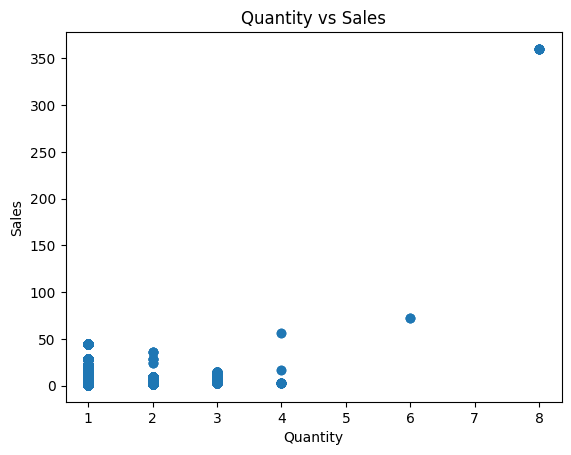

In [202]:
plt.figure()
plt.scatter(df['quantity'], df['sales'])
plt.title("Quantity vs Sales")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.show()

6. Store mana yang memiliki rata-rata penjualan per transaksi tertinggi?

In [203]:
avg_sales_store = df.groupby('store')['sales'].mean().sort_values(ascending=False)
avg_sales_store

store
Lower Manhattan    4.814726
Hell's Kitchen     4.661696
Astoria            4.589891
Name: sales, dtype: float64

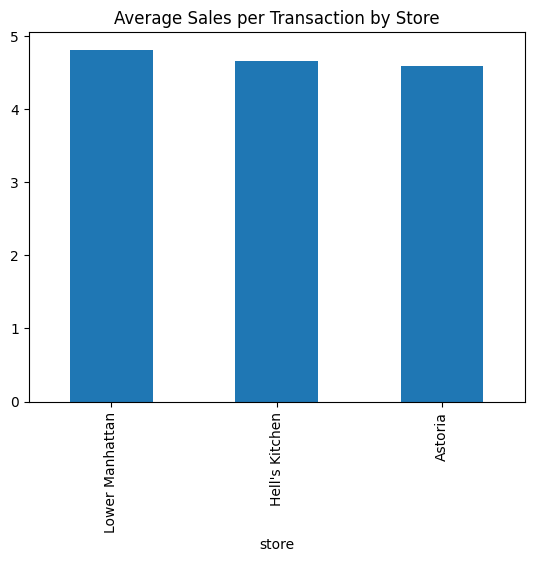

In [204]:
avg_sales_store.plot(kind='bar')
plt.title("Average Sales per Transaction by Store")
plt.show()

7. Bagaimana distribusi dan pola penjualan produk di seluruh store?

In [205]:
product_store = df.groupby(['product', 'store'])['sales'].sum().unstack()

# Mengisi nilai NaN (jika ada produk yang tidak terjual di store tertentu)
product_store = product_store.fillna(0)

product_store.head()

store,Astoria,Hell's Kitchen,Lower Manhattan
product,,,
Barista Espresso,27935.00,32420.20,31051.00
Biscotti,6676.50,6339.25,6777.78
Black tea,760.75,1065.05,886.05
Brewed Black tea,16141.00,15575.50,16215.50
Brewed Chai tea,27427.90,25645.30,24008.75


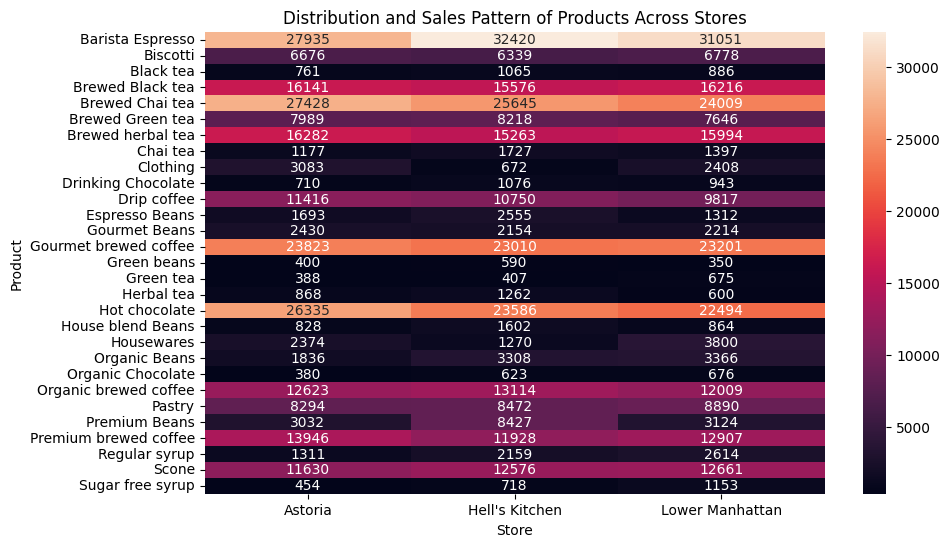

In [206]:
plt.figure(figsize=(10,6))
sns.heatmap(product_store, annot=True, fmt=".0f")

plt.title("Distribution and Sales Pattern of Products Across Stores")
plt.xlabel("Store")
plt.ylabel("Product")
plt.show()

1. Bagaimana tren penjualan dari waktu ke waktu? Tren Penjualan (Jan–Jun 2023)

Total sales per bulan:

Jan: 81,677.74

Feb: 76,145.19

Mar: 98,834.68

Apr: 118,941.08

Mei: 156,727.76

Jun: 166,485.88

Penjualan sempat turun di Februari, lalu naik konsisten sampai Juni. Lonjakan paling signifikan terjadi mulai Maret ke April, dan kembali melonjak di Mei.

Pergerakan ini menunjukkan pertumbuhan yang kuat menjelang pertengahan tahun. Kenaikan dari Januari ke Juni hampir dua kali lipat. Ini bukan fluktuasi kecil. Ini akselerasi.

Ada indikasi:
Demand meningkat, aktivitas operasional membaik atau faktor musiman mulai terasa. Tren ini menunjukkan pertumbuhan yang baik.

2. Store mana yang memiliki total penjualan tertinggi?

Total sales:

Hell’s Kitchen: 236,511.17

Astoria: 232,243.91

Lower Manhattan: 230,057.25

Selisih antar store relatif tipis. Tidak ada store yang benar-benar mendominasi jauh. Hell’s Kitchen unggul tipis. Artinya distribusi performa antar store cukup seimbang. Tidak ada ketimpangan ekstrem, ini menunjukkan performa antar store berjalan stabil.

3. Produk apa yang paling banyak terjual berdasarkan quantity?

Top 3 quantity:

Brewed Chai tea – 26,250

Gourmet brewed coffee – 25,973

Barista Espresso – 24,943

Permintaan tinggi terkonsentrasi pada minuman berbasis teh dan kopi utama. Produk minuman jelas menjadi tulang punggung volume transaksi. Tingginya volume penjualan menunjukkan produk ini menjadi andalan bisnis.

4. Produk mana yang menghasilkan revenue(pendapatan) terbesar?

Top 3 revenue:

Barista Espresso – 91,406.20

Brewed Chai tea – 77,081.95

Hot chocolate – 72,416.00

Di sini terlihat pergeseran. Barista Espresso bukan yang tertinggi di quantity, tetapi tertinggi di revenue. Ini berarti harga atau margin per unit lebih tinggi. Produk ini menjadi kontributor utama pendapatan. Jika terjadi gangguan stok di sini, dampaknya besar. Revenue tidak sepenuhnya ditentukan volume. Struktur harga memainkan peran penting.

5. Apakah ada hubungan antara quantity dan sales?

Nilai korelasi: 0.356
Ini korelasi positif, tetapi lemah ke sedang.

Artinya:
Quantity memang berpengaruh ke sales. Tapi bukan faktor dominan. Ini masuk akal karena harga antar produk berbeda cukup jauh. Satu unit espresso bernilai lebih tinggi dibanding satu unit pastry atau tea.

6. Store mana yang memiliki rata-rata penjualan per transaksi tertinggi?

Rata-rata per store:

Lower Manhattan: 4.81

Hell’s Kitchen: 4.66

Astoria: 4.59

Lower Manhattan memiliki nilai transaksi tertinggi.
Menariknya, Lower Manhattan bukan store dengan total sales tertinggi. Hell’s Kitchen unggul di total, tetapi Lower Manhattan unggul di nilai rata-rata per transaksi.

Artinya:
Pelanggan Lower Manhattan cenderung membeli dengan nilai lebih tinggi per transaksi. Hell’s Kitchen kemungkinan memiliki volume transaksi lebih banyak. Ini menunjukkan perbedaan perilaku konsumen antar store.

7. Bagaimana distribusi dan pola penjualan produk di seluruh store?

Beberapa pola yang terlihat:
Barista Espresso kuat di semua store dan menjadi produk paling dominan secara revenue. Brewed Chai tea juga konsisten tinggi di seluruh lokasi. Beberapa produk menunjukkan variasi kecil antar store, tetapi tidak ada perbedaan ekstrem. Distribusi terlihat relatif merata. Tidak ada store yang benar-benar lemah pada kategori utama.

Ini mengindikasikan:
Portofolio produk cukup stabil antar store. Preferensi konsumen antar store tidak terlalu kontras Model bisnis dan positioning brand konsisten. Namun tetap terlihat bahwa produk minuman premium memberikan kontribusi paling besar di seluruh lokasi.

Kesimpulan:
Bisnis menunjukkan pertumbuhan kuat menuju pertengahan tahun.Performa antar store relatif seimbang. Minuman premium menjadi driver utama revenue. Struktur revenue terbentuk dari kombinasi harga dan volume. Perilaku pembelian berbeda tipis antar lokasi, terutama dalam nilai transaksi rata-rata.

Struktur pendapatan terlihat sehat dan tidak bergantung pada satu store saja. Produk inti jelas mendominasi, dan pertumbuhan tren menunjukkan pertumbuhan yang baik.